In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [4]:
dataset_path = '/kaggle/input/crop-dataset-augmented/dataset-augmented2'

In [5]:
# Function to load and preprocess an individual image
def load_and_preprocess_image(file_path, target_size=(224, 224)):
    image = cv2.imread(file_path)
    image = cv2.resize(image, target_size)
    image = image.flatten()  # Flatten the image into a 1D array
    return image

# List all class directories
class_dirs = os.listdir(dataset_path)

# Load images and assign labels
data = []
labels = []

for class_label, class_dir in enumerate(class_dirs):
    class_path = os.path.join(dataset_path, class_dir)
    image_files = os.listdir(class_path)

    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        data.append(image_path)
        labels.append(class_label)

# Convert lists to NumPy arrays
labels = np.array(labels)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# Function to load and preprocess images in batches
def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for image_path in image_paths:
        image = load_and_preprocess_image(image_path, target_size)
        images.append(image)
    return np.array(images)

# Load and preprocess training images
train_images = load_and_preprocess_images(train_data)

# Create an SVM classifier
svm = SVC()

# Train the SVM classifier
svm.fit(train_images, train_labels)

# Load and preprocess testing images
test_images = load_and_preprocess_images(test_data)

# Predict labels for the test set
y_pred = svm.predict(test_images)

# Calculate accuracy before tuning
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy before tuning: {accuracy}")


Accuracy before tuning: 0.36666666666666664


In [6]:
from sklearn.metrics import classification_report

# Print classification report
report = classification_report(test_labels, y_pred, zero_division=1)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.56      0.50      0.53        10
           2       0.31      0.44      0.36         9
           3       0.50      0.50      0.50         8
           4       0.33      0.11      0.17         9
           5       0.60      0.43      0.50         7
           6       0.75      0.30      0.43        10
           7       0.83      0.45      0.59        11
           8       1.00      0.00      0.00        11
           9       0.33      0.22      0.27         9
          10       0.50      0.09      0.15        11
          11       0.00      0.00      0.00         4
          12       0.20      0.33      0.25         6
          13       0.71      0.62      0.67         8
          14       0.80      0.67      0.73         6
          15       0.38      0.33      0.35         9
          16       0.41      0.88      0.56         8
    

In [7]:

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=3)
grid_search.fit(train_images, train_labels)

# Get the best SVM classifier with tuned hyperparameters
best_svm = grid_search.best_estimator_

# Predict labels for the test set using the best classifier
y_pred_tuned = best_svm.predict(test_images)

# Calculate accuracy after tuning
accuracy_tuned = accuracy_score(test_labels, y_pred_tuned)
print(f"Accuracy after tuning: {accuracy_tuned}")


Accuracy after tuning: 0.44166666666666665


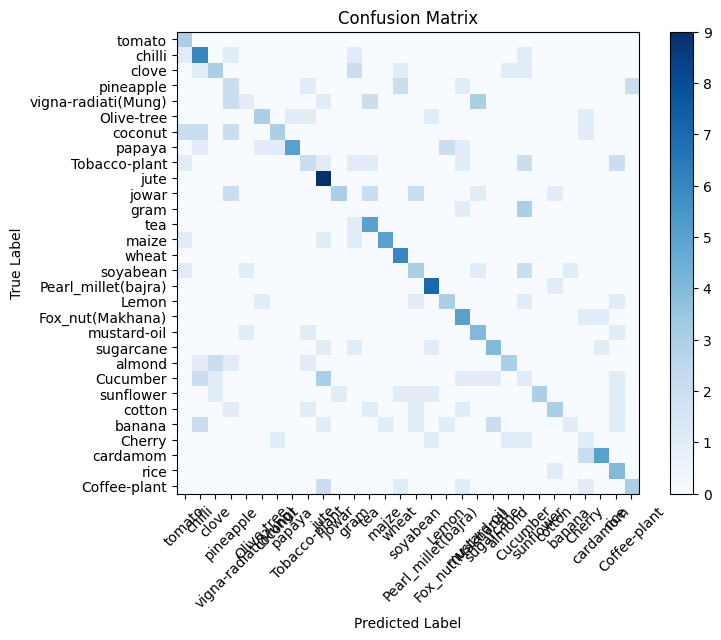

In [8]:

# Plot confusion matrix
cm = confusion_matrix(test_labels, y_pred_tuned)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_dirs))
plt.xticks(tick_marks, class_dirs, rotation=45)
plt.yticks(tick_marks, class_dirs)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
